In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
% matplotlib inline
rc('text', usetex=True)
rc('font', family='serif')

In [3]:
ab = str(raw_input("Model: "))
model = ab + "_millennium"
path = "/home/esteban/Escritorio/Practica/Data/" + model
os.chdir( path )

Model: L16


In [4]:
type_gal = np.load('type.npy')
loghalomass = np.log10(np.load('mdhalo.npy') + 1e-10) + 10 # mdhalo in Durham (L16, GP14)

In [5]:
NBIN = 30
logm_min = 9.5
logm_max = 15.5
labels = ((loghalomass - logm_min)/(logm_max - logm_min) * NBIN).astype('int')
bin_width = (logm_max - logm_min)/NBIN
bins = np.array([logm_min + bin_width*i for i in range(NBIN)]) + bin_width * 0.5

In [6]:
%%time
N = np.zeros(NBIN)
mask = (labels >= 0) & (labels < NBIN)
for index, tp in zip(labels[mask], type_gal[mask]):
    if tp == 0: N[index] += 1
n = N/(500**3)
        

CPU times: user 30 s, sys: 1.61 s, total: 31.6 s
Wall time: 31.5 s


In [7]:
np.savetxt("hmf_%s"%ab, np.array([bins, n]).T)

In [9]:
n

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.18291200e-03,   4.22001200e-02,   3.37627280e-02,
         2.17416080e-02,   1.47527840e-02,   9.80445600e-03,
         6.45760000e-03,   4.27240800e-03,   2.79143200e-03,
         1.82431200e-03,   1.19137600e-03,   7.79600000e-04,
         5.10848000e-04,   3.31672000e-04,   2.13568000e-04,
         1.36704000e-04,   8.62560000e-05,   5.11600000e-05,
         3.03440000e-05,   1.71920000e-05,   9.48800000e-06,
         4.93600000e-06,   2.27200000e-06,   7.36000000e-07,
         3.28000000e-07,   4.00000000e-08,   0.00000000e+00])

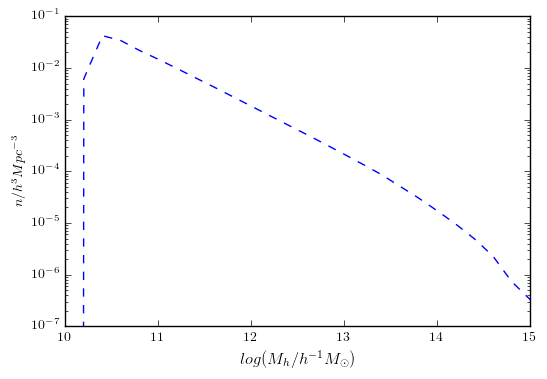

In [8]:
plt.plot(bins, n, 'b--')
plt.yscale('log')
plt.xlim(10,15)
plt.ylim(1e-7, 1e-1)
plt.ylabel(r"$n/h^3 Mpc^{-3}$")
plt.xlabel(r"$log(M_h / h^{-1}M_{\odot})$", fontsize = 12)